# Машинное обучение, DS-поток, осень 2022
## Задание 3.1


**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 30 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 100 баллов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

### Задача 1 

Докажите, что в методе k-means кластеры образуют выпуклые множества. Выполняется ли данное свойство для кластеров, определеяемых гауссовской смесью? Под кластером имеется в виду область пространства признаков.

**Решение:**

**a)** Пусть точки $x_1$ и $x_2$ лежат в одном кластере с номером $k$. Покажем, что точка $\lambda x_1 + (1-\lambda)x_2$ при $\lambda \in (0, 1)$ также лежит в нем, что будет означать выпуклость кластера. 

По построению метода получаем, что для любого другого кластера $s$ выполнено $\|x_i - \mu_k\|^2 < \|x_i - \mu_s\|^2,$ где $\mu_k$ и $\mu_s$ &mdash; центры соответствующих кластеров.

Раскроем скобки в этом неравенстве: $$\|x_i\|^2 - 2\langle x_i, \mu_k\rangle + \|\mu_k\|^2 < \|x_i\|^2 - 2\langle x_i, \mu_s\rangle + \|\mu_s\|^2.$$

Сократим
$$- 2\langle x_i, \mu_k\rangle + \|\mu_k\|^2 < - 2\langle x_i, \mu_s\rangle + \|\mu_s\|^2.$$

Просуммируем неравенства для $i=1,2$ с весами $\lambda$ и $1-\lambda$:
$$- 2\langle \lambda x_1 + (1-\lambda)x_2, \mu_k\rangle + \|\mu_k\|^2 < - 2\langle \lambda x_1 + (1-\lambda)x_2, \mu_s\rangle + \|\mu_s\|^2.$$

Добавим к обеим частям норму $x_1 + (1-\lambda)x_2$ и сгруппируем
$$\|\lambda x_1 + (1-\lambda)x_2\|^2 - 2\langle \lambda x_1 + (1-\lambda)x_2, \mu_k\rangle + \|\mu_k\|^2 < \|\mu_k\|^2 - 2\langle \lambda x_1 + (1-\lambda)x_2, \mu_s\rangle + \|\lambda x_1 + (1-\lambda)x_2\|^2,$$
$$\|(\lambda x_1 + (1-\lambda)x_2) - \mu_k\|^2 < \|(\lambda x_1 + (1-\lambda)x_2) - \mu_s\|^2.$$

В силу произвольности кластера $s$ получаем, что точка $\lambda x_1 + (1-\lambda)x_2$ также лежит в кластере $k$.

**б)** Для гауссовской смеси это может быть не верно. Например, если компоненты гауссовской смеси имеют центр в нуле и матрицы ковариаций $\begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}$ и $\begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$. Разделяющим подпространством является сфера.

### Задача 2 
Проведите свое исследование датасета из `data.txt` на кластеризацию изученными методами, реализованными в sklearn:

- k-means;
- DBSCAN;
- Иерархическая кластеризация.

Для каждого метода выше обоснуйте, почему выбранные вами гиперпараметры оптимальны, исходя из внутренней структуры данных. Если вы не можете применить какой-то из методов на этих данных, то обоснуйте, почему.

*Примечание.* Задача является небольшим упражнением и не предполагает большое исследование.

In [2]:
import numpy as np

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt("data.txt")

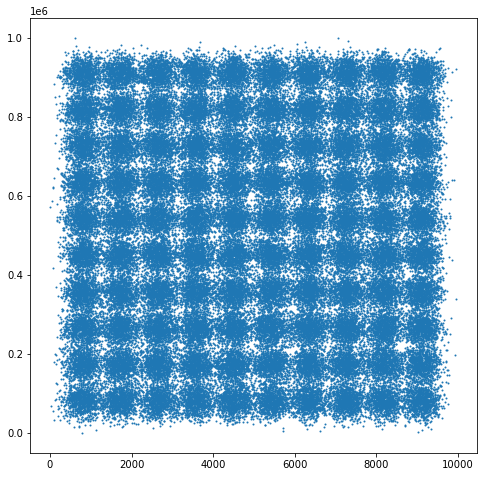

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1],s=1)
plt.show()

Данные образуют сто округлых/квадратных кластеров. Заметим, что масштаб по двум осям оказался разный!

**KMeans**

In [5]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

kmeans = KMeans(n_clusters=100)
clusters = kmeans.fit_predict(data_scaled)

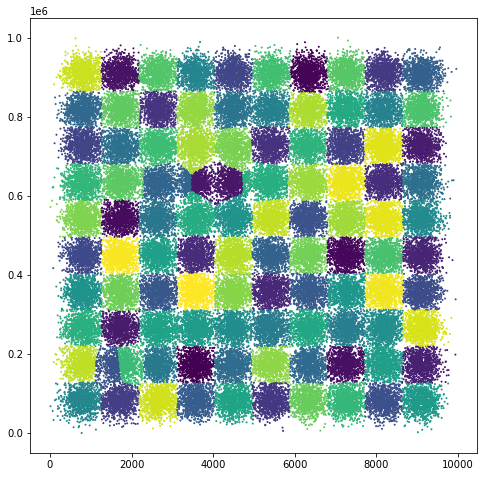

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], s=1, c=clusters)
plt.show()

**DBSCAN**

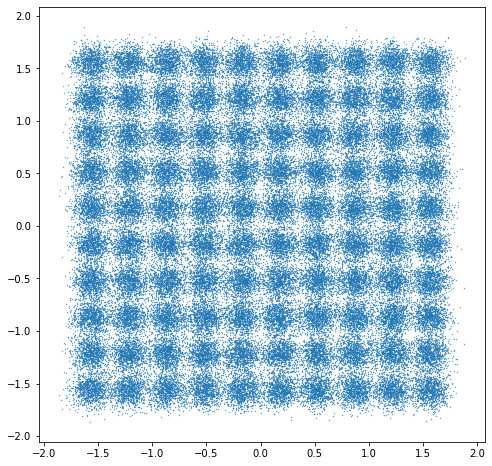

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=0.1)
plt.show()

Хотим по 10 кластеров по каждой стороне. Значения от -1.8 до 1.8

In [14]:
print(f"Ширина кластера: {(data_scaled[:, 0].max() - data_scaled[:, 0].min())/ 10}")

Ширина кластера: 0.3743000953852368


In [15]:
print("Элементов в кластере приблизительно", len(data) / 100)

Элементов в кластере приблизительно 1000.0


In [24]:
eps = 0.02
min_samples=10

dbscan = DBSCAN(eps=eps, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)

In [25]:
len(set(clusters))

381

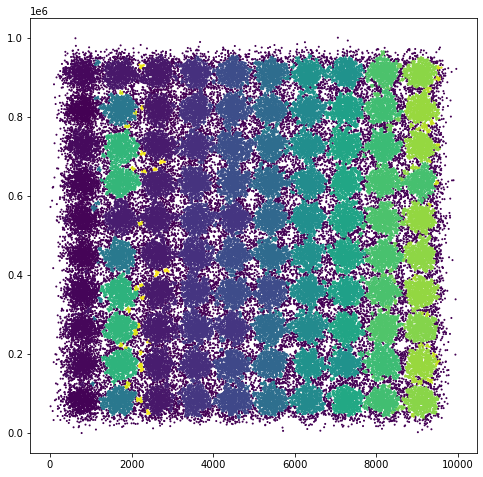

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], s=1, c=clusters)
plt.show()

**Иерархическая кластеризация**

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=100)
agg_clustering.fit(data_scaled)

### Задача 3
Скачайте <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis">данные</a> о клиентах некоторой торговой сети.

Цель задачи &mdash; кластеризовать клиентов с целью модификации продукта под разные типы пользовательских кластеров. Например, вместо того, чтобы тратиться на продвижение нового продукта каждому клиенту, можно продавать продукт только в том кластере, где клиенты с наибольшей вероятностью его купят.

In [ ]:
data = pd.read_csv("./marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

Посмотрим на признаки. Прочитайте также информацию о признаках на странице данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Посмотрим на диапазон дат регистрации

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
data["Dt_Customer"].min(), data["Dt_Customer"].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

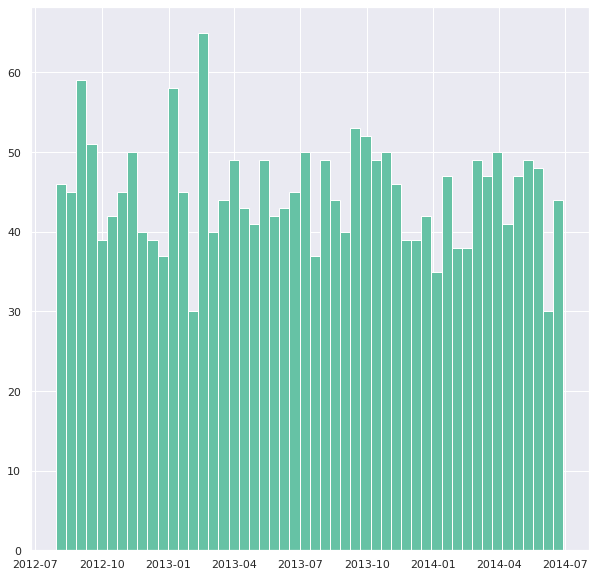

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(data["Dt_Customer"], bins=50);

Как мы видим, из равномерности можно сделать вывод, что выгруженны все пользователи зарегистрировавшиеся в этом промежутке и только они, причем последняя дата регистрации в районе июля 2014.

Оценим дату выгрузки как дату регистрации + количество дней с последней покупки:

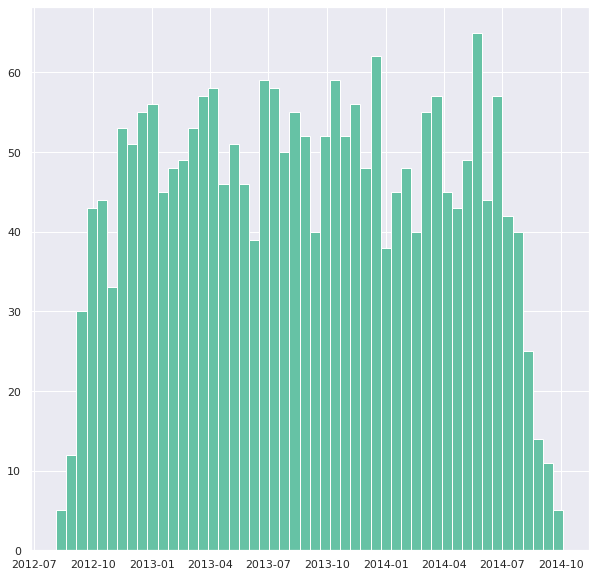

In [ ]:
last_date = data["Dt_Customer"] + data["Recency"].apply(lambda x: pd.Timedelta(days=x))
plt.figure(figsize=(10, 10))
plt.hist(last_date, bins=50);

Определим дату анализа

In [ ]:
end_date = pd.Timestamp('2014-12-31')

Посчитаем для каждого клиента количество дней с момента регистрации

In [ ]:
data["usage_time"] = (end_date - data["Dt_Customer"]) / pd.Timedelta('1 day')
data["usage_time"]

0       848.0
1       298.0
2       497.0
3       324.0
4       346.0
        ...  
2235    566.0
2236    204.0
2237    340.0
2238    341.0
2239    807.0
Name: usage_time, Length: 2240, dtype: float64

Создайте следующие признаки:
* возраст клиента на основе даты рождения
* сумма покупок по всем категориям
* общее количество детей, сложив `Kidhome` и `Teenhome`
* на основе количества детей и семейного положения (`Marital_Status`) определите *предполагаемый* размер семьи
* средние траты клиента в день в период пользования сервисом, поделив суммарные траты на количество дней от даты регистрации (*см. примечание далее*)

In [ ]:
data["age"] = end_date.year - data["Year_Birth"]
data['spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data["children"] = data["Kidhome"] + data["Teenhome"]
data["family"] = data["children"] + data['Marital_Status'].replace({'Divorced':1,
                                                                    'Single':1,
                                                                    'Married':2,
                                                                    'Together':2,
                                                                    'Alone':1,
                                                                    'Absurd':1,
                                                                    'Widow':1,
                                                                    'YOLO':1})

*Примечание.* 

Клиент может перестать пользоваться сервисом спустя какое-то время, поэтому корректнее было бы делить на время пользования сервисом. В данных не сказано о том, в каких случаях клиента можно отнести в отток, а так же не указан принцип выгрузки данных (все клиенты или только активные), но имеется признак `Recency` &mdash; количество дней с момента последней покупки клиента. 

Исследуйте этот признак и попробуйте понять, можно ли из данных сделать вывод о том, какие типы клиентов присутствуют в данных, каких клиентов можно отнести в отток. Если это сделать удалось, то при вычислении средних трат клиента в день делить нужно на количество дней использования сервиса в случае, если клиент попал в отток. Если клиент активен, то мы считаем, что он до сих пор пользуется сервисом, даже если последнюю покупку он совершал несколько дней назад.

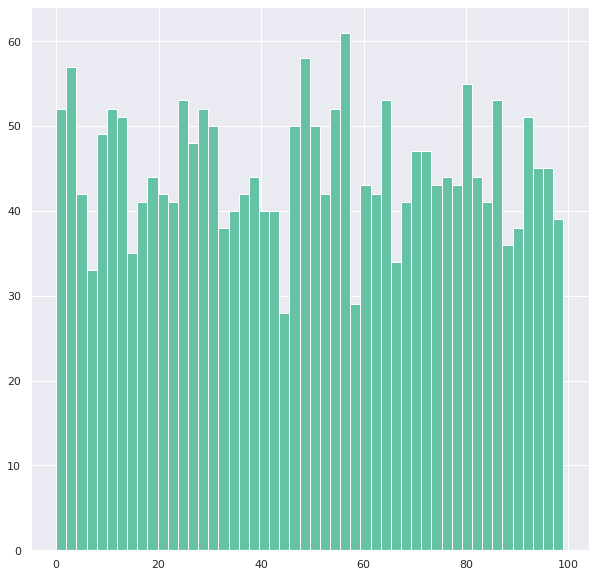

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(data["Recency"], bins=50);

In [ ]:
data[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]].sum()

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
NumWebVisitsMonth      11909
dtype: int64

Как мы видим, максимальное Recency 100 дней (около 3х месяцев). Также можно видеть, что распределение равномерное, и половина заказов приходится на онлайн покупки, поэтому сделать однозначный вывод о неактивности пользователей нельзя, поэтому будем расчитывать их покупки до дня анализа

In [ ]:
data["expense"] = data['spending'] / data["usage_time"]
data["expense"]

0       1.906840
1       0.090604
2       1.561368
3       0.163580
4       1.219653
          ...   
2235    2.369258
2236    2.176471
2237    3.650000
2238    2.472141
2239    0.213135
Name: expense, Length: 2240, dtype: float64

Далее будем работать с признаками:
* возраст клиента
* предполагаемый размер семьи
* средние траты клиента в день
* `Income` &mdash; годовой доход клиента

Проведите графическое исследование признаков. При необходимости выполните предобработку, обосновав ее необходимость.

In [ ]:
main_data = data[["age", "family", "expense", "Income"]]
main_data

age  family   expense   Income
0      57       1  1.906840  58138.0
1      60       3  0.090604  46344.0
2      49       2  1.561368  71613.0
3      30       3  0.163580  26646.0
4      33       3  1.219653  58293.0
...   ...     ...       ...      ...
2235   47       3  2.369258  61223.0
2236   68       5  2.176471  64014.0
2237   33       1  3.650000  56981.0
2238   58       3  2.472141  69245.0
2239   60       4  0.213135  52869.0

[2240 rows x 4 columns]

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      2240 non-null   int64  
 1   family   2240 non-null   int64  
 2   expense  2240 non-null   float64
 3   Income   2216 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 70.1 KB


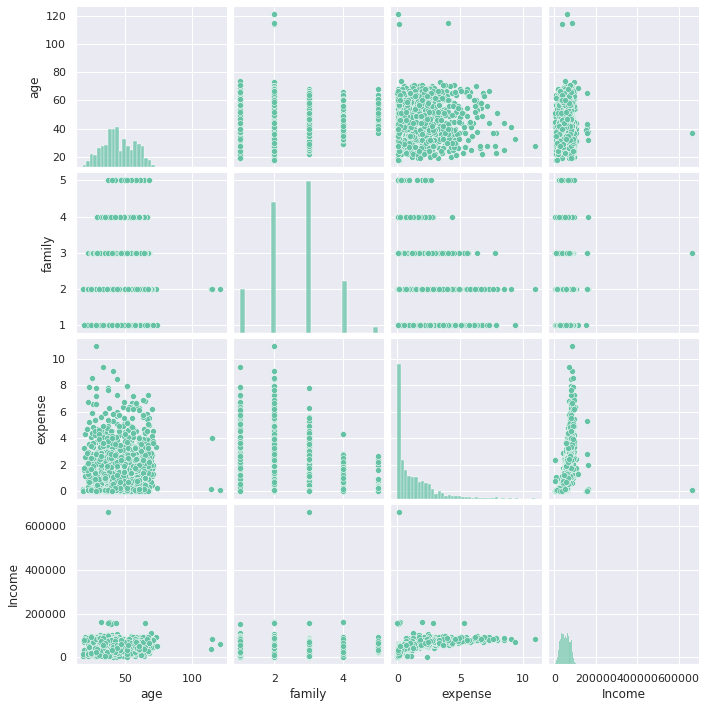

In [ ]:
sns.pairplot(main_data);

Как мы видим в данных нет пропуков, но есть выбросы, давайте удалим их

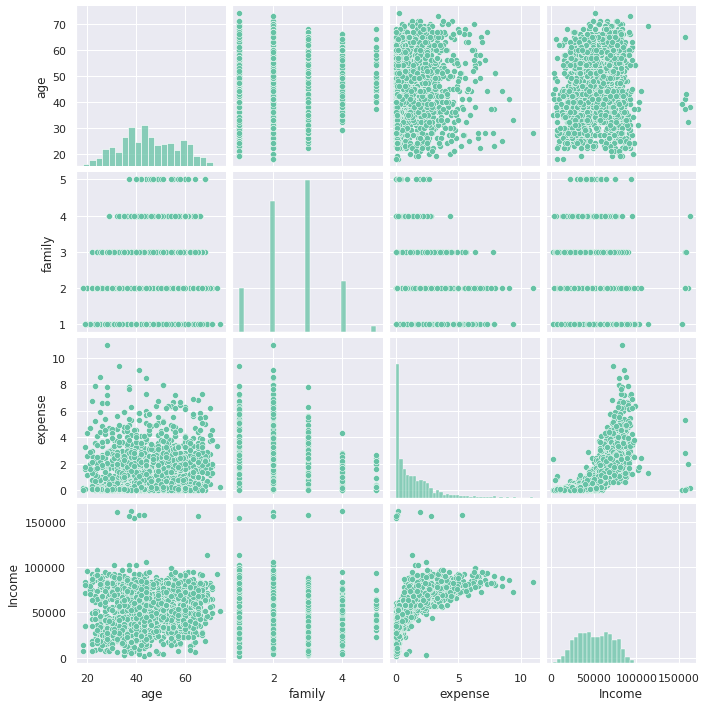

In [ ]:
main_data = main_data[main_data["age"] <= 100]
main_data = main_data[main_data["Income"] <= 200000]
sns.pairplot(main_data);

Перейдем к кластеризации клиентов. Какой метод кластеризации будете использовать и почему? Как определить оптимальное количество кластеров или, в зависимости от метода, других гиперпараметров?

Как мы видим, найти количество кластеров довольно проблематично, поэтому давайте воспользуемся DBSCAN. Для начала отмасштабируем данные:

In [ ]:
main_data.describe()

age       family      expense         Income
count  2212.000000  2212.000000  2212.000000    2212.000000
mean     45.086347     2.593128     1.260905   51958.810579
std      11.701599     0.906236     1.462973   21527.278844
min      18.000000     1.000000     0.007974    1730.000000
25%      37.000000     2.000000     0.156818   35233.500000
50%      44.000000     3.000000     0.706651   51371.000000
75%      55.000000     3.000000     1.927387   68487.000000
max      74.000000     5.000000    10.949239  162397.000000

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(main_data)
scaled_data

array([[ 1.01835202, -1.75835869,  0.44162157,  0.28710487],
       [ 1.27478522,  0.44907004, -0.80012773, -0.26088203],
       [ 0.33453017, -0.65464433,  0.20542485,  0.9131964 ],
       ...,
       [-1.03311355, -1.75835869,  1.63340978,  0.23334696],
       [ 1.10382975,  0.44907004,  0.82811454,  0.80317156],
       [ 1.27478522,  1.55278441, -0.716354  ,  0.04229031]])

Выполните кластеризацию этим методом и подберите оптимальное количество гиперпараметров.

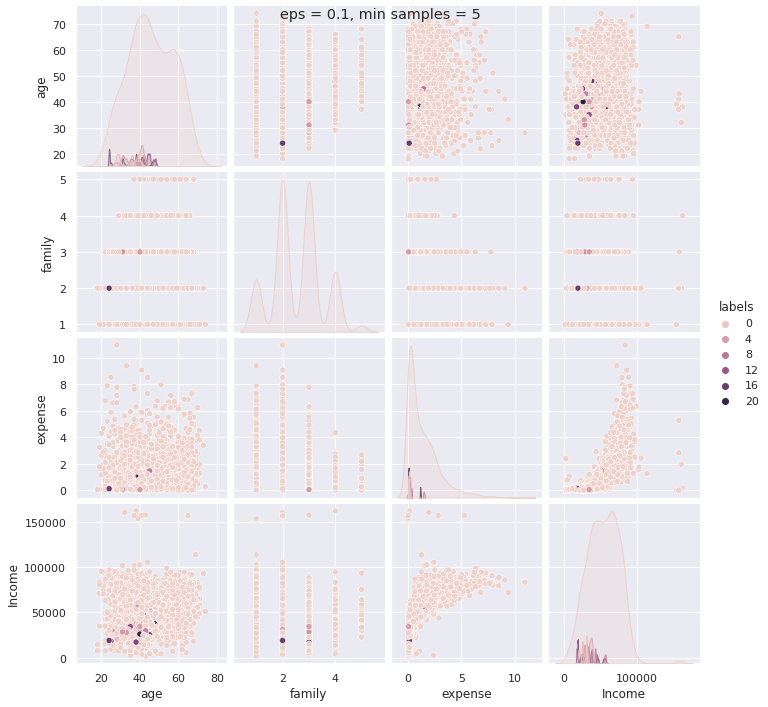

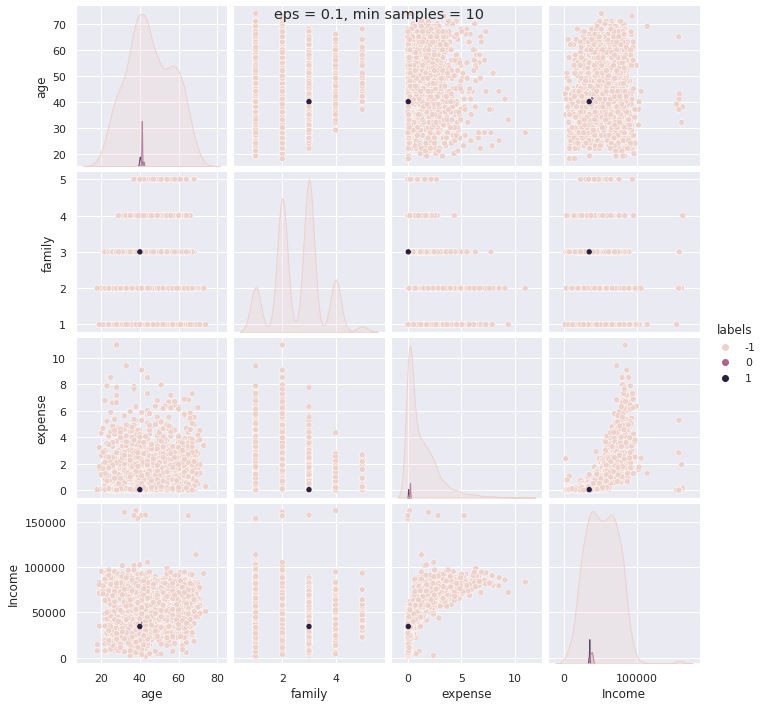

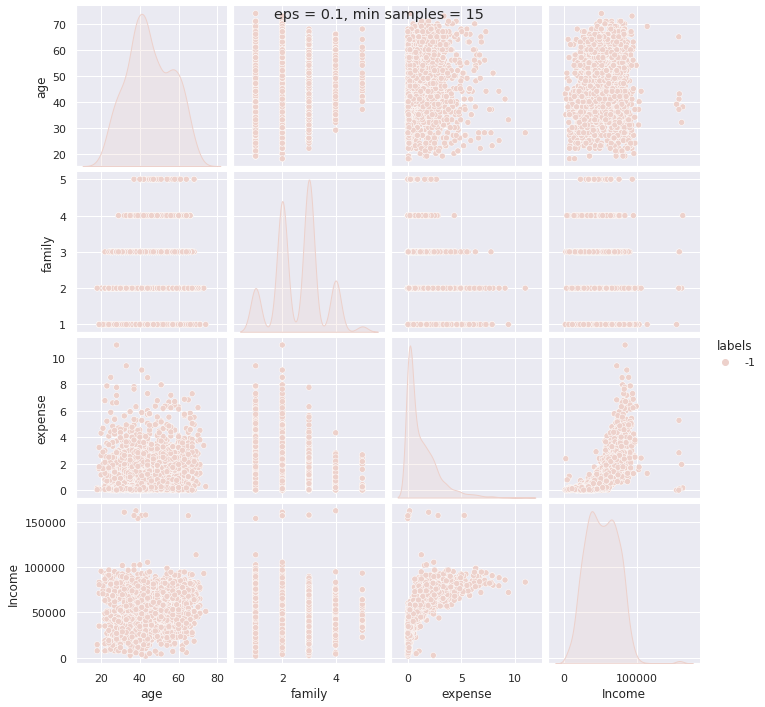

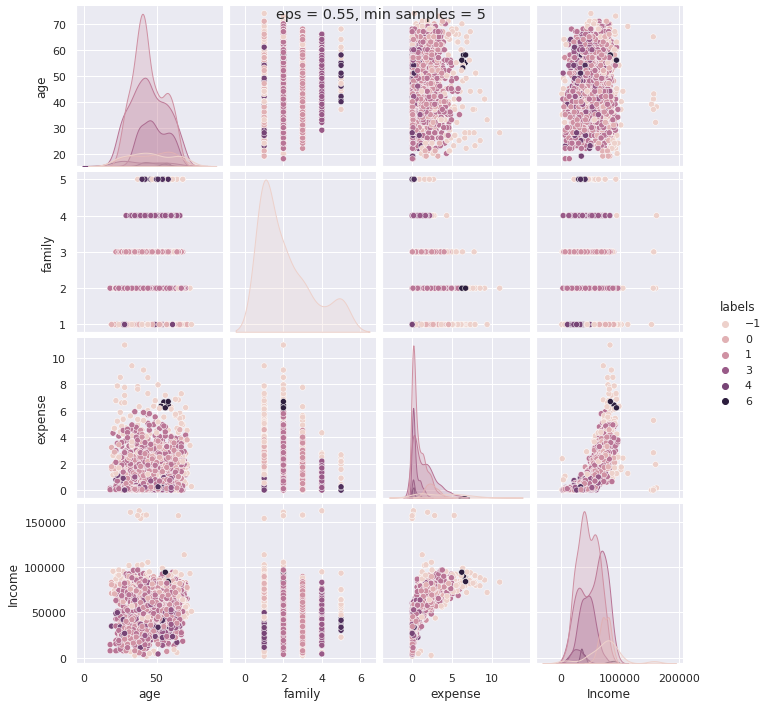

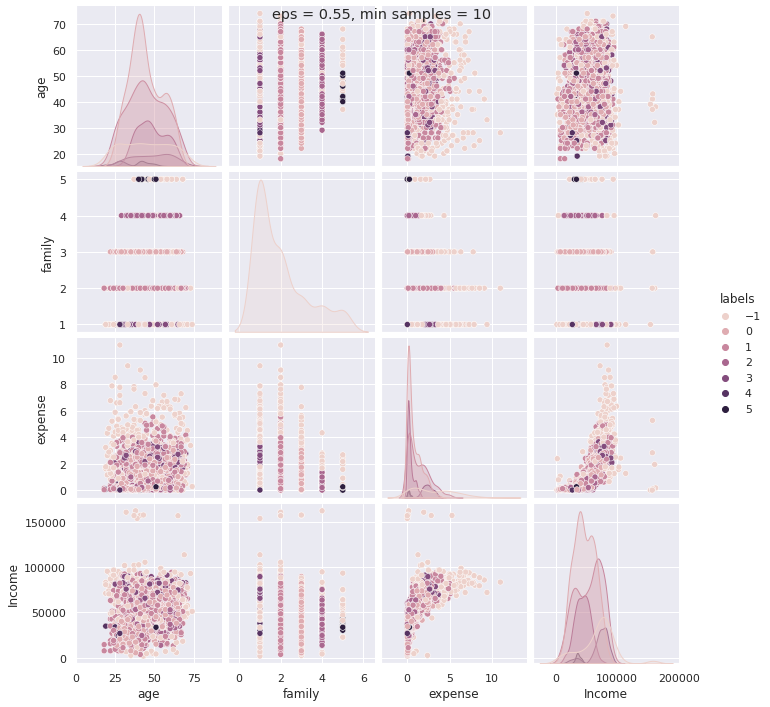

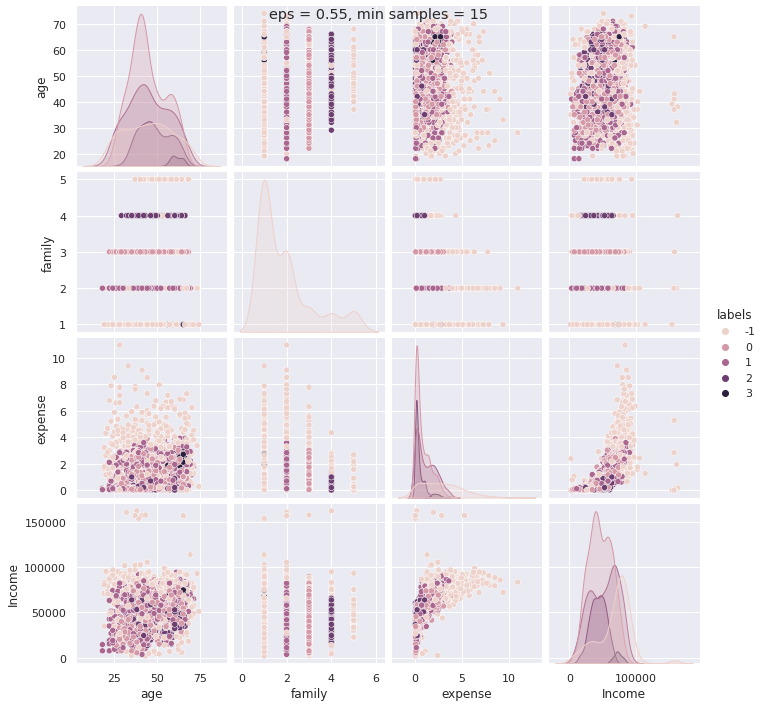

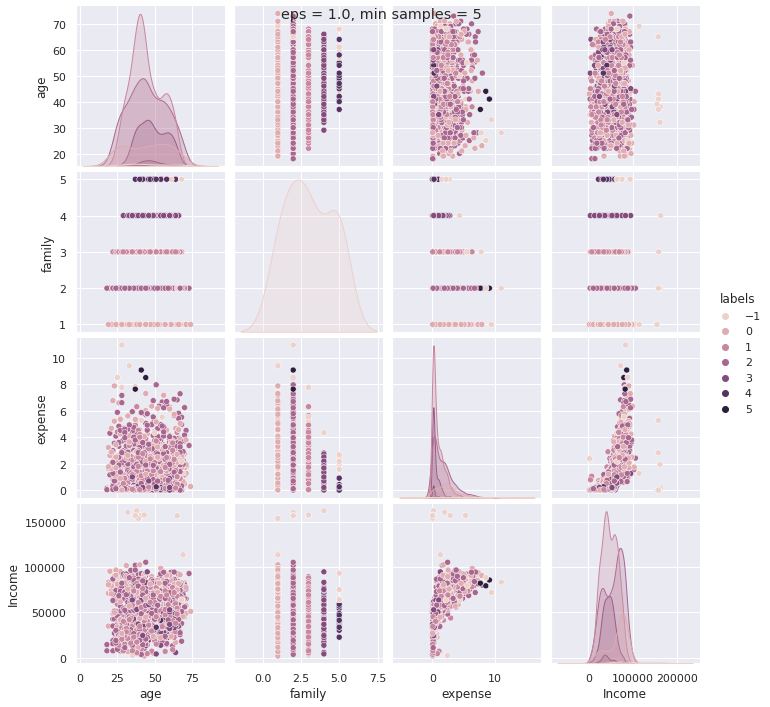

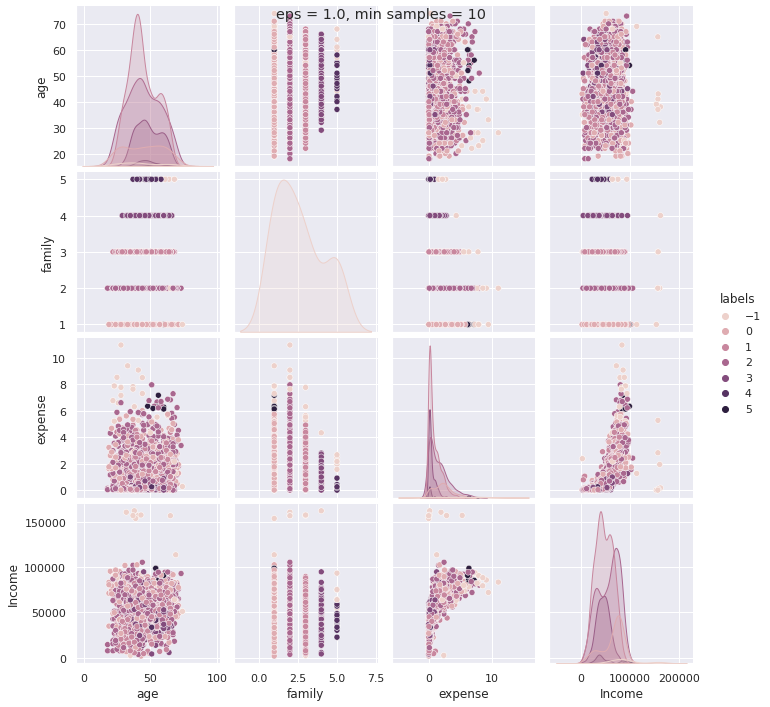

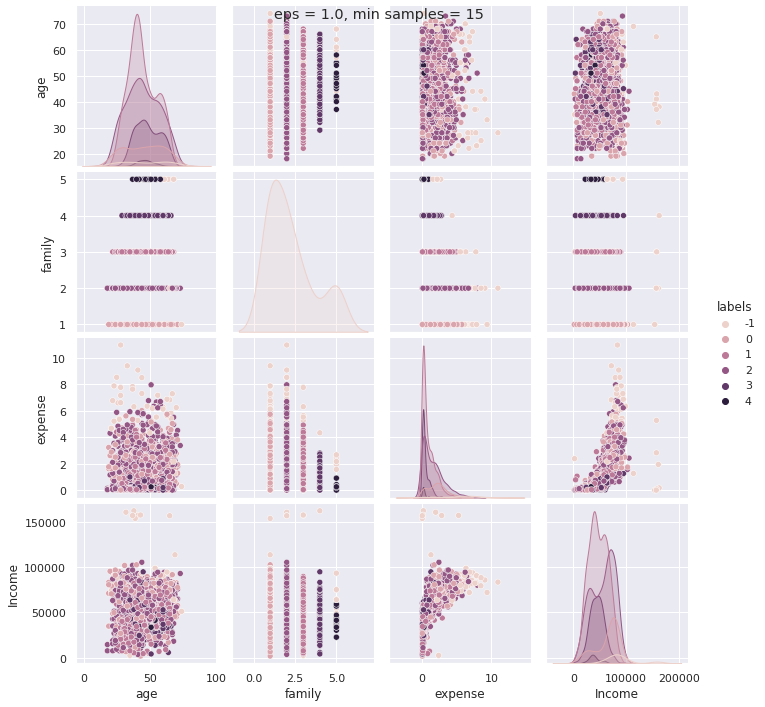

In [ ]:
from sklearn.cluster import DBSCAN


# Сетка параметров
eps, min_samples = np.linspace(0.1, 1.0, 3), np.arange(5, 16, 5)

for e in eps:
    for m in min_samples:
        db = DBSCAN(eps=e, min_samples=m).fit(scaled_data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        main_data["labels"] = db.labels_

        g = sns.pairplot(main_data, hue="labels")
        g.fig.suptitle(f'eps = {e}, min samples = {m}')
        plt.show()

Как мы видим DBSCAN лучше всего сработал при больших eps, при чем при 0.55 класстеры в основном определяет возраст и средние траты покупателя, а при eps=1 кластеры скорее определяются составом семьи. Далее будем рассматривать результат работы класстеризации при eps=0.55 и min samples=15, при чем все объекты с меткой -1 будем рассматривать как отдельный класс.

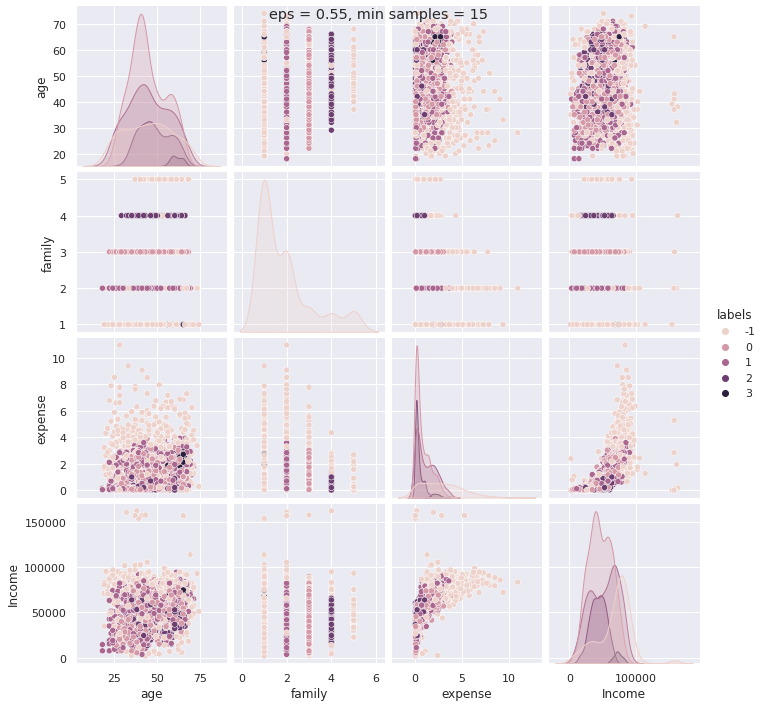

In [ ]:
# Сетка параметров
e = 0.55
m = 15

db = DBSCAN(eps=e, min_samples=m).fit(scaled_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
main_data["labels"] = db.labels_

g = sns.pairplot(main_data, hue="labels")
g.fig.suptitle(f'eps = {e}, min samples = {m}')
plt.show()

Итого 5 кластеров

Сколько элементов в каждом из полученных кластеров?

Проинтерпретируйте полученные кластеры с помощью визуального анализа. Используйте различные типы графиков (например, box plot), изученные ранее. По каким признакам кластеры различаются, на сколько? Как можно описать клиентов каждого кластера?

Насколько кластеры соприкасаются друг с другом? Что можно сказать про клиентов на границе кластеров?

Посмотрим сначала на основные статистики кластеров: число объектов, среднее, минимум и максимум


In [ ]:
main_data.groupby("labels").count()

age  family  expense  Income
labels                              
-1      441     441      441     441
 0      844     844      844     844
 1      636     636      636     636
 2      269     269      269     269
 3       22      22       22      22

In [ ]:
main_data.groupby("labels").mean()

age    family   expense        Income
labels                                             
-1      44.750567  1.891156  2.808758  67432.190476
 0      44.137441  3.000000  0.783188  46141.313981
 1      44.619497  2.000000  1.170262  51991.705975
 2      48.405204  4.000000  0.359218  43078.275093
 3      61.136364  1.000000  2.206038  72601.954545

In [ ]:
main_data.groupby("labels").min()

age  family   expense   Income
labels                                
-1       19       1  0.016360   1730.0
 0       22       3  0.015342   5305.0
 1       18       2  0.007974   3502.0
 2       29       4  0.021592  13260.0
 3       56       1  1.636126  61284.0

In [ ]:
main_data.groupby("labels").max()

age  family    expense    Income
labels                                  
-1       74       5  10.949239  162397.0
 0       68       3   3.896806   89694.0
 1       71       2   3.929440   94384.0
 2       66       4   1.582435   67309.0
 3       66       1   3.172297   82623.0

Посмотрим, на box plot в зависимости от кластера

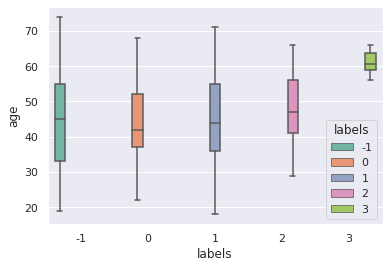

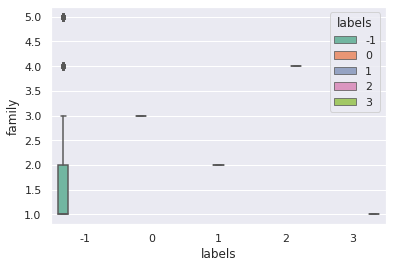

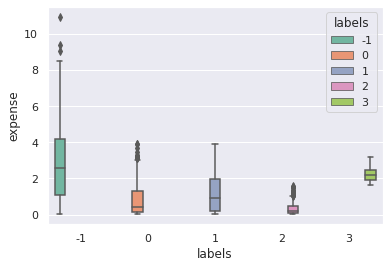

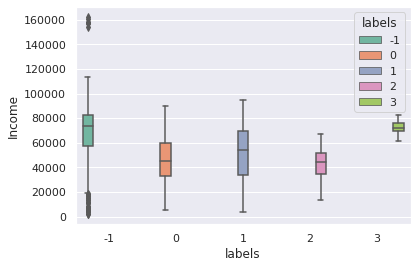

In [ ]:
for col in ["age", "family", "expense", "Income"]:
  sns.boxplot(data=main_data, y=col, x="labels", hue="labels")
  plt.show()

Попробуйте также применить другие изученные методы кластеризации. Насколько лучше или хуже получился результат?

Попробуем также K-means. В dbscan у нас получалось 5-6 класстеров, выберем такое же число

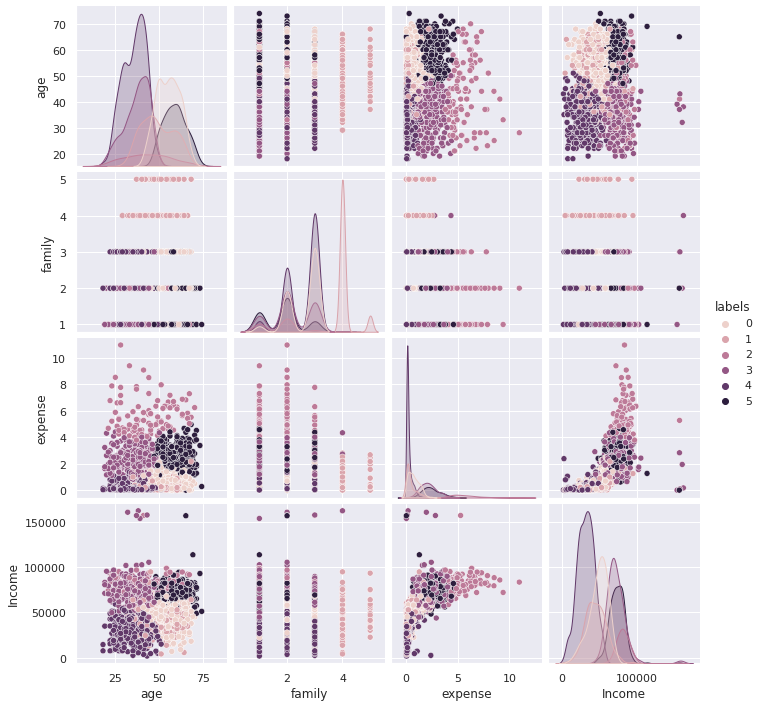

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(scaled_data)
main_data["labels"] = kmeans.predict(scaled_data)
sns.pairplot(main_data, hue="labels");

Проанализируем полученные классы, также как на предыдущем шаге

In [ ]:
main_data.groupby("labels").count()

age  family  expense  Income
labels                              
0       449     449      449     449
1       322     322      322     322
2       109     109      109     109
3       391     391      391     391
4       656     656      656     656
5       285     285      285     285

In [ ]:
main_data.groupby("labels").mean()

age    family   expense        Income
labels                                             
0       54.884187  2.603563  0.737551  48564.135857
1       48.863354  4.096273  0.463241  44895.717391
2       43.449541  1.724771  5.665084  81876.366972
3       37.168798  2.171355  2.146795  72162.516624
4       35.678354  2.562500  0.247310  31433.507622
5       58.526316  1.859649  2.419901  73370.954386

In [ ]:
main_data.groupby("labels").min()

age  family   expense   Income
labels                                
0        41       1  0.019296   6835.0
1        29       4  0.018913   4023.0
2        21       1  3.791016  58684.0
3        19       1  0.018349  43783.0
4        18       1  0.007974   1730.0
5        45       1  0.016360  45938.0

In [ ]:
main_data.groupby("labels").max()

age  family    expense    Income
labels                                  
0        70       3   2.502137   75072.0
1        68       5   2.812766   94871.0
2        70       3  10.949239  157243.0
3        50       4   4.402715  162397.0
4        51       4   2.389503   59060.0
5        74       3   4.963043  156924.0

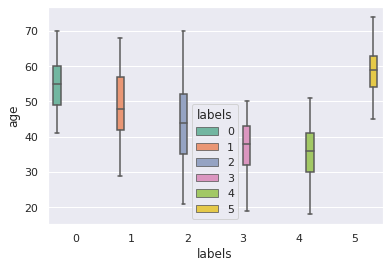

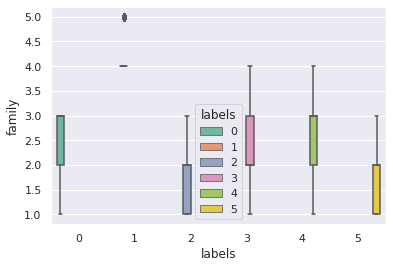

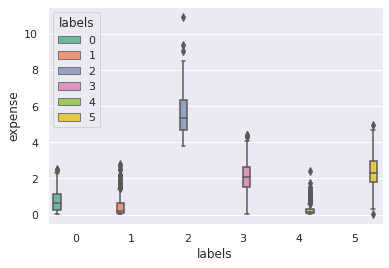

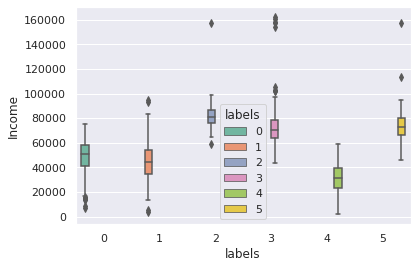

In [ ]:
for col in ["age", "family", "expense", "Income"]:
  sns.boxplot(data=main_data, y=col, x="labels", hue="labels")
  plt.show()

Не забывайте про выводы.

**Вывод:**